In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [12]:
print("\nTRAIN:")
display(df_train.head())
print("SHAPE:",df_train.shape)

print("\nTEST:")
display(df_test.head())
print("SHAPE:",df_test.shape)


TRAIN:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
833,0,3,Mr. Maurice Sirota,male,20.0,0,0,8.0500
97,1,2,Mrs. John T (Ada Julia Bone) Doling,female,34.0,0,1,23.0000
711,0,2,Mr. Samuel Greenberg,male,52.0,0,0,13.0000
43,1,3,Miss. Margaret Delia Devaney,female,19.0,0,0,7.8792
585,0,3,Mr. Eliezer Gilinski,male,22.0,0,0,8.0500


SHAPE: (709, 8)

TEST:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
580,0,1,Mr. John Hugo Ross,male,36.0,0,0,40.1250
814,0,3,Mr. John Fredrik Alexander Holm,male,43.0,0,0,6.4500
147,0,2,Mr. Michel Navratil,male,36.5,0,2,26.0000
134,0,2,Mr. Emile Richard,male,23.0,0,0,15.0458
633,0,3,Mr. Antti Gustaf Leinonen,male,32.0,0,0,7.9250


SHAPE: (178, 8)


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 833 to 510
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 709 non-null    int64  
 1   Pclass                   709 non-null    int64  
 2   Name                     709 non-null    object 
 3   Sex                      709 non-null    object 
 4   Age                      709 non-null    float64
 5   Siblings/Spouses Aboard  709 non-null    int64  
 6   Parents/Children Aboard  709 non-null    int64  
 7   Fare                     709 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


In [15]:
df_train.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [16]:
df_train.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.377997,2.301834,29.915247,0.559944,0.389281,33.890884
std,0.485229,0.843225,14.173187,1.184112,0.823866,52.599894
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,32.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


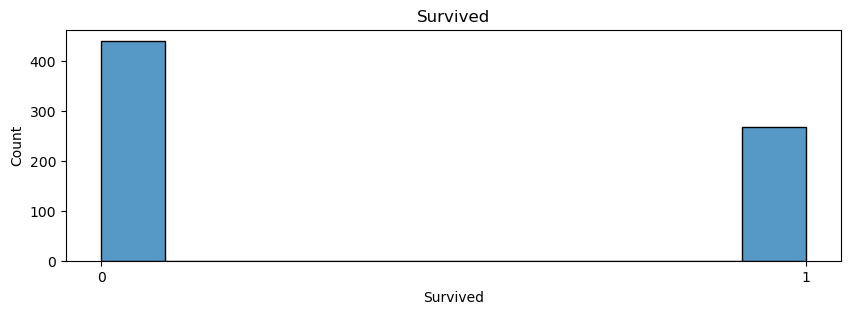

In [26]:
plt.figure(figsize=(10, 3))
sns.histplot(df_train['Survived'], kde=False)
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()